In [1]:
from itertools import cycle, islice

from modandcrypt import *

<center>

# Crittografia 

## &amp;

# Aritmetica modulare

&nbsp;

&nbsp;

&nbsp;

### Massimo Santini

</center>

<center>

# Cosa

</center>

<img src="./img/scitala.png" style="width: 40%; margin: auto; display: block;" />

<center>

# Come

</center>

<img src="./img/cow.png" style="width: 40%; margin: auto; display: block;" />

<center>

# Perché

</center>

<img src="./img/Gauss.png" style="width: 40%; margin: auto; display: block;" />

> Queste note sono generate a partire da un notebook [Jupyter](https://jupyter.org/)
> disponibile su [GitHub](https://github.com/mapio/modandcrypt).
> In particolare, molto del materiale qui visualizzato è prodotto da del codice in 
> [Python](https://www.python.org/) sviluppato appositamente e distribuito in modalità
> *open source* e che quindi potete liberamente studiare, modificare e distribuire.
> Se vi piace programmare, date una occhiata!

<img src="./img/qr.png" style="width: 40%; margin: auto; display: block;" />

<center>

# Crittografia

</center>

<img src="./img/parties.png" style="width: 90%; margin: auto; display: block;" />

$$\Huge C(p, k) = c \qquad\text{e}\qquad D(c, k) = p$$

$$\Huge D(C(p, k), k) = p$$

$$\Huge D(c) = p$$

<center>

# Monoalfabetici

</center>

<img src="./img/ruota.png" style="width: 50%; margin: auto; display: block;" />

In [2]:
pos = list(range(NUM_SEMPLICI))
n = 6
tabella([
  SEMPLICI_VISUALIZZABILI[:n] + ['…'] + SEMPLICI_VISUALIZZABILI[-n:], 
  pos[:n] + ['…'] + pos[-n:]
], index = sgr(['lettera', 'posizione']))

┌───────────┬───┬───┬───┬───┬───┬───┬───┬────┬────┬────┬────┬────┬────┐
│ lettera   │ A │ B │ C │ D │ E │ F │ … │ W  │ X  │ Y  │ Z  │ ␢  │ ↩  │
├───────────┼───┼───┼───┼───┼───┼───┼───┼────┼────┼────┼────┼────┼────┤
│ posizione │ 0 │ 1 │ 2 │ 3 │ 4 │ 5 │ … │ 22 │ 23 │ 24 │ 25 │ 26 │ 27 │
└───────────┴───┴───┴───┴───┴───┴───┴───┴────┴────┴────┴────┴────┴────┘


In [3]:
testo = 'BELLA ZIO'
tabella([testo, a_posizioni(testo)], index = sgr(['testo','posizioni']))

┌───────────┬───┬───┬────┬────┬───┬────┬────┬───┬────┐
│ testo     │ B │ E │ L  │ L  │ A │    │ Z  │ I │ O  │
├───────────┼───┼───┼────┼────┼───┼────┼────┼───┼────┤
│ posizioni │ 1 │ 4 │ 11 │ 11 │ 0 │ 26 │ 25 │ 8 │ 14 │
└───────────┴───┴───┴────┴────┴───┴────┴────┴───┴────┘


In [4]:
tabella([
  a_posizioni(testo), 
  [3] * len(testo), 
  orologio_somma(a_posizioni(testo), [3] * len(testo))
], index = sgr(['a', 'b', 'a + b']))

┌───────┬───┬───┬────┬────┬───┬────┬────┬────┬────┐
│ a     │ 1 │ 4 │ 11 │ 11 │ 0 │ 26 │ 25 │  8 │ 14 │
├───────┼───┼───┼────┼────┼───┼────┼────┼────┼────┤
│ b     │ 3 │ 3 │  3 │  3 │ 3 │  3 │  3 │  3 │  3 │
├───────┼───┼───┼────┼────┼───┼────┼────┼────┼────┤
│ a + b │ 4 │ 7 │ 14 │ 14 │ 3 │  1 │  0 │ 11 │ 17 │
└───────┴───┴───┴────┴────┴───┴────┴────┴────┴────┘


In [5]:
c = cifra(testo, 'D')

┌───┬─────┬─────┬──────┬──────┬─────┬─────┬──────┬──────┬──────┐
│ p │ B:1 │ E:4 │ L:11 │ L:11 │ A:0 │ :26 │ Z:25 │ I:8  │ O:14 │
├───┼─────┼─────┼──────┼──────┼─────┼─────┼──────┼──────┼──────┤
│ k │ D:3 │ D:3 │ D:3  │ D:3  │ D:3 │ D:3 │ D:3  │ D:3  │ D:3  │
├───┼─────┼─────┼──────┼──────┼─────┼─────┼──────┼──────┼──────┤
│ c │ E:4 │ H:7 │ O:14 │ O:14 │ D:3 │ B:1 │ A:0  │ L:11 │ R:17 │
└───┴─────┴─────┴──────┴──────┴─────┴─────┴──────┴──────┴──────┘


In [6]:
print(c) 

EHOODBALR


In [7]:
d = decifra(c, 'D')

┌───┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┐
│ c │ E:4  │ H:7  │ O:14 │ O:14 │ D:3  │ B:1  │ A:0  │ L:11 │ R:17 │
├───┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┤
│ k │ Z:25 │ Z:25 │ Z:25 │ Z:25 │ Z:25 │ Z:25 │ Z:25 │ Z:25 │ Z:25 │
├───┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┤
│ p │ B:1  │ E:4  │ L:11 │ L:11 │ A:0  │ :26  │ Z:25 │ I:8  │ O:14 │
└───┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┘


In [8]:
print(d)

BELLA ZIO


In [9]:
def C(p, k):
  return da_posizioni(
    orologio_somma(
      a_posizioni(p), 
      a_posizioni(k)
    )
  )

In [10]:
def D(c, k):
  return da_posizioni(
    orologio_somma(
      a_posizioni(c), 
      a_posizioni(
        inverti(k)
      )
    )
  )

In [11]:
p = 'BELLA ZIO'
k = 'D'

In [12]:
c = C(p, k)
c

'EHOODBALR'

In [13]:
d = D(c, k)
d

'BELLA ZIO'

<center>

# Crittoanalisi

</center>

In [14]:
vals = [[a_visualizzazione(k), a_visualizzazione(D(c, k))] for k in SEMPLICI]
tabella(vals[:5] + [['…', '…']] + vals[-2:], header = sgr(['k', 'D(c, k)']))

┌─────┬───────────┐
│ k   │ D(c, k)   │
├─────┼───────────┤
│ A   │ EHOODBALR │
├─────┼───────────┤
│ B   │ DGNNCA↩KQ │
├─────┼───────────┤
│ C   │ CFMMB↩␢JP │
├─────┼───────────┤
│ D   │ BELLA␢ZIO │
├─────┼───────────┤
│ E   │ ADKK↩ZYHN │
├─────┼───────────┤
│ …   │ …         │
├─────┼───────────┤
│ ␢   │ GJQQFDCNT │
├─────┼───────────┤
│ ↩   │ FIPPECBMS │
└─────┴───────────┘


In [15]:
for k in SEMPLICI[:10]:
  print(a_visualizzazione((D(c, k))))

EHOODBALR
DGNNCA↩KQ
CFMMB↩␢JP
BELLA␢ZIO
ADKK↩ZYHN
↩CJJ␢YXGM
␢BIIZXWFL
ZAHHYWVEK
Y↩GGXVUDJ
X␢FFWUTCI


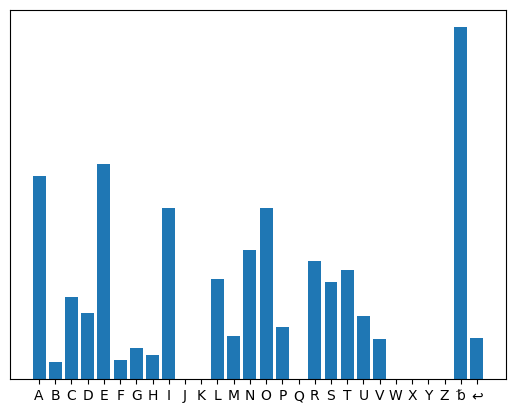

In [16]:
PROMESSI_SPOSI = da_gutenberg('https://www.gutenberg.org/cache/epub/45334/pg45334.txt')
istogramma_lettere(PROMESSI_SPOSI)

In [17]:
pps = semplifica("""
Tutt'e due si volsero a chi ne sapeva piu' di loro, e da cui 
aspettavano uno schiarimento, il quale non poteva essere che 
doloroso: tutt'e due, lasciando travedere, in mezzo al dolore, 
e con l'amore diverso che ognun d'essi portava a Lucia.
""")
print(pps)



TUTTE DUE SI VOLSERO A CHI NE SAPEVA PIU DI LORO E DA CUI 
ASPETTAVANO UNO SCHIARIMENTO IL QUALE NON POTEVA ESSERE CHE 
DOLOROSO TUTTE DUE LASCIANDO TRAVEDERE IN MEZZO AL DOLORE 
E CON LAMORE DIVERSO CHE OGNUN DESSI PORTAVA A LUCIA



In [18]:
c = C(pps, 'G')
print(c)

FZ ZZKEJ KEYOE
URYKXUEGEINOETKEYGVK
GEVO EJOERUXUEKEJGEI OEFGYVKZZG
GTUE TUEYINOGXOSKTZUEOREW GRKETUTEVUZK
GEKYYKXKEINKEFJURUXUYUEZ ZZKEJ KERGYIOGTJUEZXG
KJKXKEOTESKDDUEGREJURUXKEFKEIUTERGSUXKEJO
KXYUEINKEUMT TEJKYYOEVUXZG
GEGER IOGF


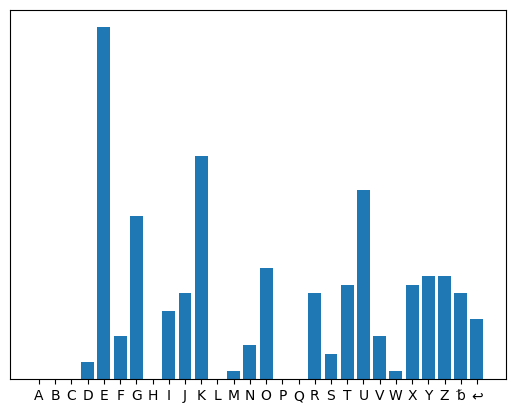

In [19]:
istogramma_lettere(c)

In [20]:
print(D(c, 'G'))


TUTTE DUE SI VOLSERO A CHI NE SAPEVA PIU DI LORO E DA CUI 
ASPETTAVANO UNO SCHIARIMENTO IL QUALE NON POTEVA ESSERE CHE 
DOLOROSO TUTTE DUE LASCIANDO TRAVEDERE IN MEZZO AL DOLORE 
E CON LAMORE DIVERSO CHE OGNUN DESSI PORTAVA A LUCIA



<center>

# Polialfabetici

</center>

<img src="./img/Vigenere.png" style="width: 50%; margin: auto; display: block;" />

In [21]:
testo = 'BELLA ZIO'
chiave = 'CIAO'
tabella([
  a_posizioni(testo), 
  islice(cycle(a_posizioni(chiave)), len(testo)), 
  orologio_somma(a_posizioni(testo), a_posizioni(chiave))
], index = sgr(['a', 'b', 'a + b']))

┌───────┬───┬────┬────┬────┬───┬────┬────┬────┬────┐
│ a     │ 1 │  4 │ 11 │ 11 │ 0 │ 26 │ 25 │  8 │ 14 │
├───────┼───┼────┼────┼────┼───┼────┼────┼────┼────┤
│ b     │ 2 │  8 │  0 │ 14 │ 2 │  8 │  0 │ 14 │  2 │
├───────┼───┼────┼────┼────┼───┼────┼────┼────┼────┤
│ a + b │ 3 │ 12 │ 11 │ 25 │ 2 │  6 │ 25 │ 22 │ 16 │
└───────┴───┴────┴────┴────┴───┴────┴────┴────┴────┘


In [22]:
c = cifra(testo, chiave)
print(c)

┌───┬─────┬──────┬──────┬──────┬─────┬─────┬──────┬──────┬──────┐
│ p │ B:1 │ E:4  │ L:11 │ L:11 │ A:0 │ :26 │ Z:25 │ I:8  │ O:14 │
├───┼─────┼──────┼──────┼──────┼─────┼─────┼──────┼──────┼──────┤
│ k │ C:2 │ I:8  │ A:0  │ O:14 │ C:2 │ I:8 │ A:0  │ O:14 │ C:2  │
├───┼─────┼──────┼──────┼──────┼─────┼─────┼──────┼──────┼──────┤
│ c │ D:3 │ M:12 │ L:11 │ Z:25 │ C:2 │ G:6 │ Z:25 │ W:22 │ Q:16 │
└───┴─────┴──────┴──────┴──────┴─────┴─────┴──────┴──────┴──────┘
DMLZCGZWQ


In [23]:
print(C(pps, 'CIAO'))

B
UFVM RWM EKGVAN EDQGAMEPIMPM ECXEHCGPWWGDWATODQGEMFI QWQ NC PSV
AHCVOMWVOMUKHWCZI GVTAAQLMSAAZGGNAPGPAVMVOAMSEGZEMEPEMBLOZQZOEQGTGV
EMFAEMNISQKINRQGTDCBERGZEMKV  GFZAAILMFWLATM NGGCAPGLOOWRSALIHGZSAAKHSAWG
WV RG SWAXODVIVOAI ZWKIOB


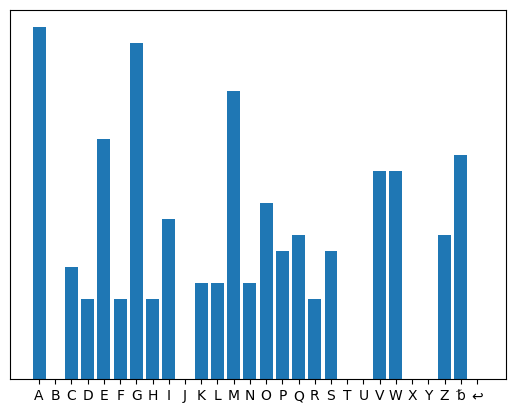

In [24]:
istogramma_lettere(C(pps, chiave))

<img src="./img/otp.png" style="width: 80%; margin: auto; display: block;" />

<center>

# E ora… magia!

</center>

<img src="./img/parties-ns.png" style="width: 90%; margin: auto; display: block;" />

<img src="./img/dh-ke.png" style="width: 40%; margin: auto; display: block;" />

<img src="./img/mdh.jpeg" style="width: 80%; margin: auto; display: block;" />

<center>

# Aritmetica modulare

</center>

<img src="./img/disqvisitiones.jpeg" style="width: 40%; margin: auto; display: block;" />